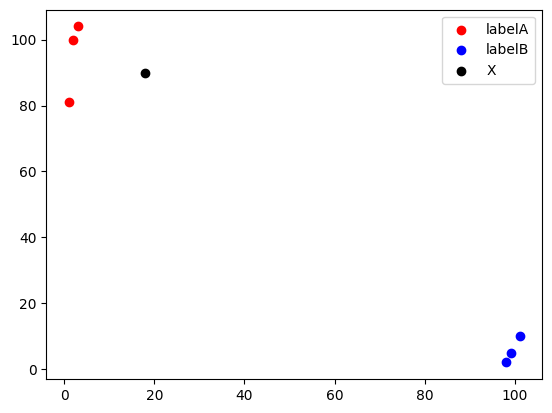

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import operator

# 已知分类的数据
x1 = np.array([3, 2, 1])
y1 = np.array([104, 100, 81])
x2 = np.array([101, 99, 98])
y2 = np.array([10, 5, 2])
scatter1 = plt.scatter(x1, y1, c='r')
scatter2 = plt.scatter(x2, y2, c='b')

# 未知数据
x = np.array([18])
y = np.array([90])
scatter3 = plt.scatter(x, y, c='k')


def gaussian(dist, sigma=10.0):
    """ Input a distance and return it`s weight"""
    weight = np.exp(-dist ** 2 / (2 * sigma ** 2))
    return weight


#画图例
plt.legend(handles=[scatter1, scatter2, scatter3], labels=['labelA', 'labelB', 'X'], loc='best')

plt.show()

In [79]:
# 已知分类的数据
x_data = np.array([[3, 104],
                   [2, 100],
                   [1, 81],
                   [101, 10],
                   [99, 5],
                   [81, 2]])
y_data = np.array(['A', 'A', 'A', 'B', 'B', 'B'])
x_test = np.array([18, 90])

In [80]:
# 计算样本数量
x_data_size = x_data.shape[0]
x_data_size

6

In [81]:
# 复制x_test
np.tile(x_test, (x_data_size, 1))

array([[18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90],
       [18, 90]])

In [82]:
# 计算x_test与每一个样本的差值
diffMat = np.tile(x_test, (x_data_size, 1)) - x_data
diffMat

array([[ 15, -14],
       [ 16, -10],
       [ 17,   9],
       [-83,  80],
       [-81,  85],
       [-63,  88]])

In [83]:
# 计算差值的平方
sqDiffMat = diffMat ** 2
sqDiffMat

array([[ 225,  196],
       [ 256,  100],
       [ 289,   81],
       [6889, 6400],
       [6561, 7225],
       [3969, 7744]])

In [84]:
# 求和
sqDistances = sqDiffMat.sum(axis=1)
sqDistances

array([  421,   356,   370, 13289, 13786, 11713])

In [85]:
# 开方
distances = sqDistances ** 0.5
distances

array([ 20.51828453,  18.86796226,  19.23538406, 115.27792503,
       117.41379817, 108.2266141 ])

In [86]:
# 从小到大排序
sortedDistances = distances.argsort()
sortedDistances

array([1, 2, 0, 5, 3, 4], dtype=int64)

In [87]:
# 求权
distancesByWeight = gaussian(sortedDistances)
distancesByWeight

array([0.99501248, 0.98019867, 1.        , 0.8824969 , 0.95599748,
       0.92311635])

In [88]:
classCount = {}
# 设置k
k = 5
for i in range(k):
    # 获取标签
    votelabel = y_data[sortedDistances[i]]
    # 统计标签数量
    classCount[votelabel] = classCount.get(votelabel, 0) + distancesByWeight[i]*1

In [89]:
classCount

{'A': 2.975211152499438, 'B': 1.8384943844176953}

In [90]:
# 根据operator.itemgetter(1)-第1个值对classCount排序，然后再取倒序
sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
sortedClassCount

[('A', 2.975211152499438), ('B', 1.8384943844176953)]

In [91]:
# 获取数量最多的标签
knnclass = sortedClassCount[0][0]
knnclass

'A'